In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [2]:
hidden_nodes = 225
middle = 50
lr = 1e-3
samples = 60000
# input_size = 784
input_size = 196
X = X_train.reshape(samples,input_size)
X = X/255.0
Lambda = 1
s = 0.05
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return np.matmul(x,W)+b

def backprop_last(output,label,out_penult):
    del1 = 2*(output-label)*diff_sigm(out_penult)
    return del1

def backprop_layer(prev_delta,out_prev,prev_weights):
    sn = (diff_sigm(out_prev)*np.matmul(prev_delta,prev_weights.T))
    return sn

W1 = np.random.normal(0,1e-3,(input_size,middle))
Bi1 = np.random.normal(0,1e-3,(1,middle))
W2 = np.random.normal(0,1e-3,(middle,hidden_nodes))
Bi2 = np.random.normal(0,1e-3,(1,hidden_nodes))
W3 = np.random.normal(0,1e-3,(hidden_nodes,middle))
Bi3 = np.random.normal(0,1e-3,(1,middle))
W4 = np.random.normal(0,1e-3,(middle,input_size))
Bi4 = np.random.normal(0,1e-3,(1,input_size))


In [3]:
epochs = 50
for i in range(epochs):
    loss = 0
    w1 = w2 = w3 = w4 = 0
    b1 = b2 = b3 = b4 = 0
    #forward pass
    out1 = layer(X,W1,Bi1)
    m1 = sigm(out1)
    out2 = layer(m1,W2,Bi2)
    z  = sigm(out2)
    out3 = layer(z,W3,Bi3)
    m2 = sigm(out3)
    out4 = layer(m2,W4,Bi4)
    y = sigm(out4)
    #BACKPROPAGATION
    del1 = backprop_last(y,X,out4)
    b4 = np.sum(del1, axis = 0).reshape(np.shape(Bi4))
    w4 = np.matmul(m2.T,del1)
#     print(del1.shape, out3.shape, W4.shape)
    s3 = backprop_layer(del1,out3,W4)
    w3 = np.matmul(z.T,s3)
    b3 = np.sum(s3,axis=0).reshape(np.shape(Bi3))
    ################ sparsity conditioning
    zm = np.mean(z,axis = 0)
    ge = (Lambda)*(-s/zm + (1-s)/(1-zm))*diff_sigm(out2)
    ################
    s2 = ge+backprop_layer(s3,out2,W3)
    b2 = np.sum(s2,axis=0).reshape(np.shape(Bi2))
    w2 = np.matmul(m1.T,s2)
    
    s1 = backprop_layer(s2,out1,W2)
    w1 = np.matmul(X.T,s1)
    b1 = np.sum(s1,axis=0).reshape(np.shape(Bi1))
    
    loss = np.sum(np.linalg.norm(y-X)**2)
    print(i,loss)
    W1 -= lr*w1
    W2 -= lr*w2
    W3 -= lr*w3
    W4 -= lr*w4
    Bi1 -= lr*b1
    Bi2 -= lr*b2
    Bi3 -= lr*b3
    Bi4 -= lr*b4
    

(0, 2526192.7411691793)
(1, 1092175.2980134233)


/home/legion/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


(2, 1120285.7971837812)
(3, 1122517.8073344266)
(4, 1107226.3683719917)
(5, 1120934.0348408422)
(6, 1119719.3255738788)
(7, 1123769.8592388378)
(8, 1123768.9290089377)
(9, 1123768.9438055411)
(10, 1123768.6342780553)
(11, 1123765.4201256179)
(12, 1123766.4387167578)
(13, 1123759.9500636223)
(14, 1123758.3145825793)
(15, 1123750.7646033117)
(16, 1123743.6043625716)
(17, 1123721.7132021494)
(18, 1123677.403072312)
(19, 1123471.4123798828)
(20, 1117630.8473269334)
(21, 1127025.7719667286)
(22, 1127022.0047895329)
(23, 1127024.605227539)
(24, 1127020.8828810328)
(25, 1127023.46893983)
(26, 1127019.4591977643)
(27, 1127022.1710622152)
(28, 1127017.2765107818)
(29, 1127020.8721453045)
(30, 1127014.2240216115)
(31, 1127018.8012821162)
(32, 1127011.1441950148)
(33, 1127014.926312063)
(34, 1127005.8164075695)
(35, 1127009.285849013)
(36, 1126995.894142487)
(37, 1126999.0521277534)
(38, 1126974.9863826905)
(39, 1126970.9610760761)
(40, 1126900.31965157)
(41, 1126779.3641361573)
(42, 1124752.9677

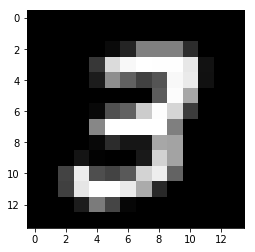

In [4]:
plt.imshow(X[7].reshape(14,14) , cmap='gray')

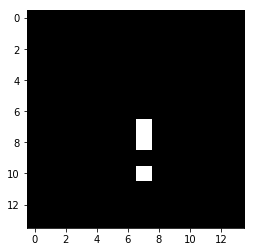

In [5]:
y = y*255.0
plt.imshow(y[7].reshape(14,14) , cmap='gray' )

In [6]:
count = 0
for i in range(len(z[1])):
    if(z[1][i] > 0.01):
        count += 1
print(count,len(z[1]))
print(np.mean(z[1]))

(163, 225)
0.032234457934461766
